In [1]:
pip install rasterio

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


Original Min: 0, Max: 13989


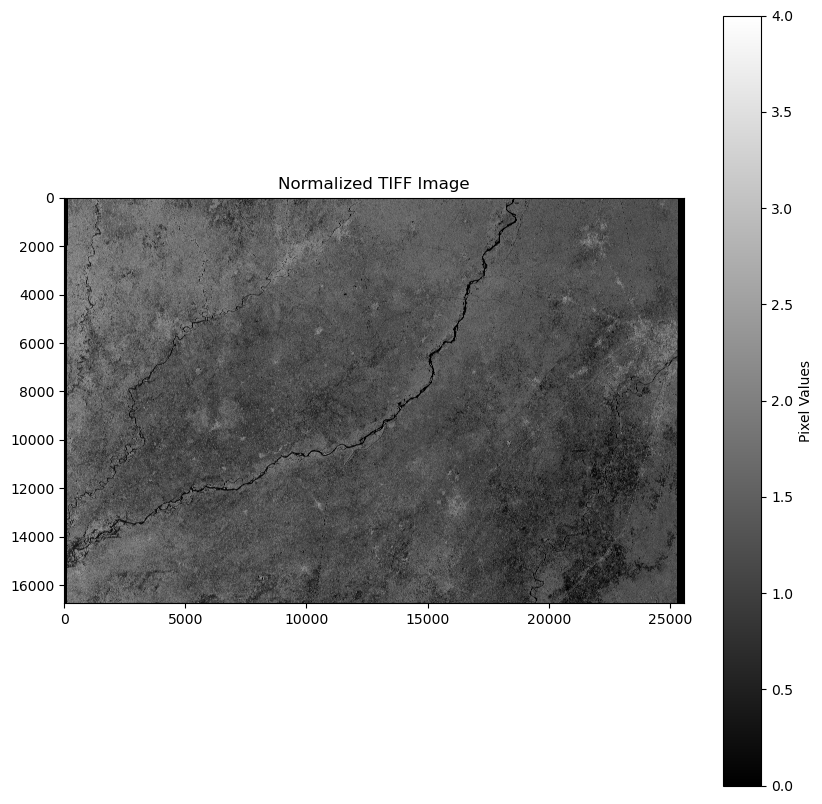

In [2]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np

# Open the TIFF file
with rasterio.open('wassaf.tiff') as src:
    tiff_data = src.read(1)  # Read the first band
    
    # Check the minimum and maximum pixel values
    min_val = np.min(tiff_data)
    max_val = np.max(tiff_data)
    print(f"Original Min: {min_val}, Max: {max_val}")

    # Normalize the pixel values to the range 0-255 for better visibility
    normalized_data = 255 * (tiff_data - min_val) / (max_val - min_val)
    normalized_data = normalized_data.astype(np.uint8)  # Convert to 8-bit format

    # Plot the normalized data
    plt.figure(figsize=(10, 10))
    plt.imshow(normalized_data, cmap='gray')
    plt.title('Normalized TIFF Image')
    plt.colorbar(label='Pixel Values')
    plt.show()


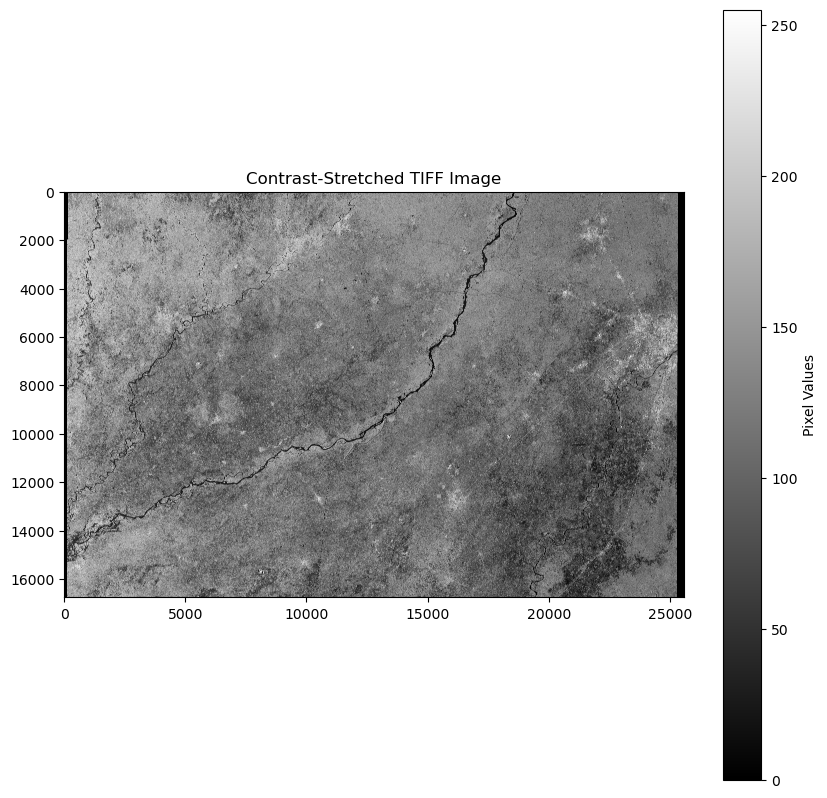

In [3]:
# Apply contrast stretching by clipping extreme values
low, high = np.percentile(tiff_data, (2, 98))  # Clip the 2nd and 98th percentiles

# Normalize using the contrast-stretched range
contrast_stretched_data = np.clip(tiff_data, low, high)
contrast_stretched_data = 255 * (contrast_stretched_data - low) / (high - low)
contrast_stretched_data = contrast_stretched_data.astype(np.uint8)

# Plot the contrast-stretched data
plt.figure(figsize=(10, 10))
plt.imshow(contrast_stretched_data, cmap='gray')
plt.title('Contrast-Stretched TIFF Image')
plt.colorbar(label='Pixel Values')
plt.show()


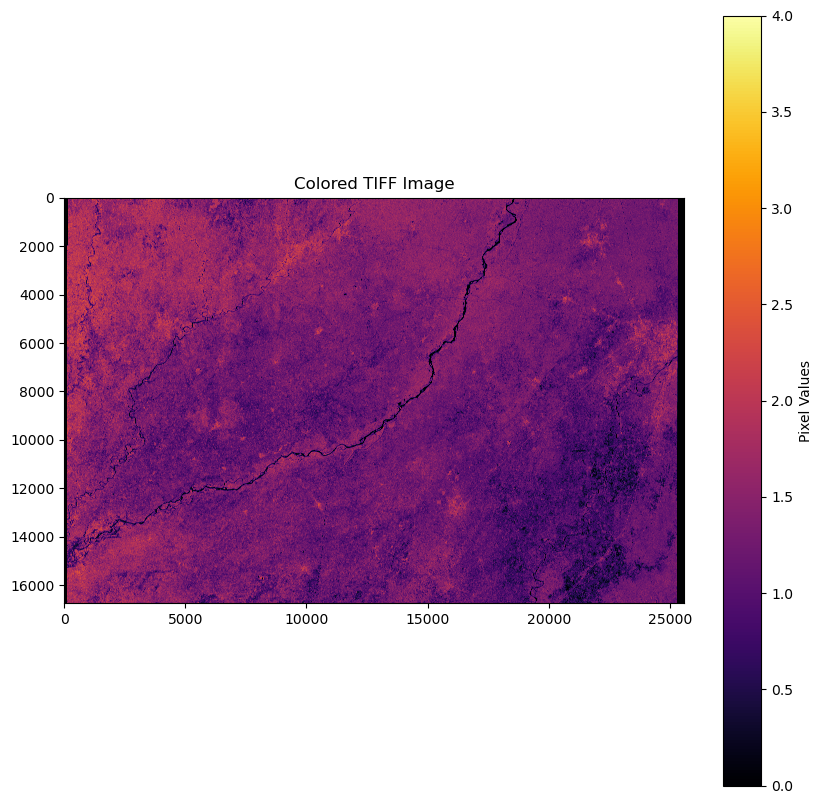

In [4]:
# Plot the normalized data with a color map
plt.figure(figsize=(10, 10))
plt.imshow(normalized_data, cmap='inferno')  # Use a different colormap (e.g., inferno, jet, etc.)
plt.title('Colored TIFF Image')
plt.colorbar(label='Pixel Values')
plt.show()


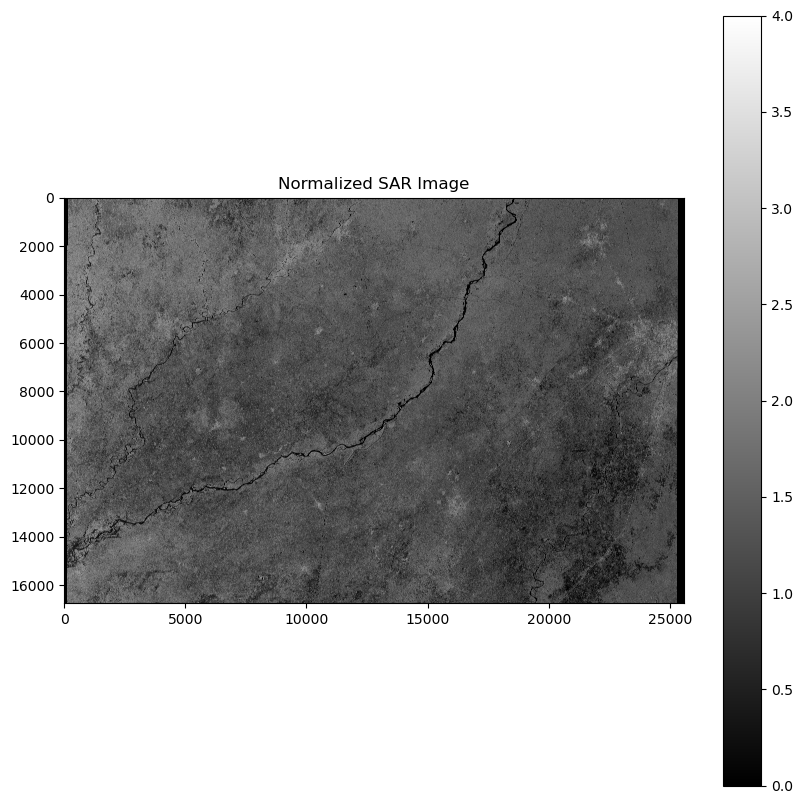

In [7]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Load the SAR TIFF file
with rasterio.open('wassaf.tiff') as src:
    sar_data = src.read(1)  # Read the first band (assumed single-band SAR)

# Normalize the data for better visualization
min_val = np.min(sar_data)
max_val = np.max(sar_data)
normalized_data = 255 * (sar_data - min_val) / (max_val - min_val)
normalized_data = normalized_data.astype(np.uint8)

# Plot the normalized image
plt.figure(figsize=(10, 10))
plt.imshow(normalized_data, cmap='gray')
plt.title('Normalized SAR Image')
plt.colorbar()
plt.show()


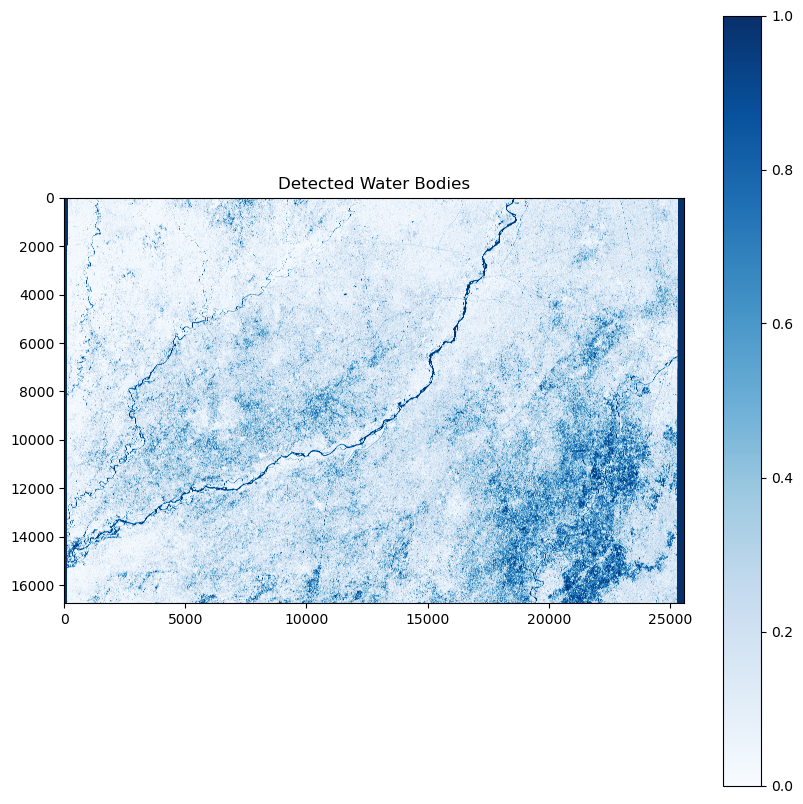

In [8]:
# Set a threshold value for detecting water (you might need to adjust this)
# SAR data: Lower backscatter values (darker pixels) often indicate water bodies
threshold_value = np.percentile(sar_data, 25)  # Use the 25th percentile as a threshold

# Create a binary mask where water is 1 and non-water is 0
water_mask = sar_data < threshold_value

# Plot the binary water mask
plt.figure(figsize=(10, 10))
plt.imshow(water_mask, cmap='Blues')
plt.title('Detected Water Bodies')
plt.colorbar()
plt.show()


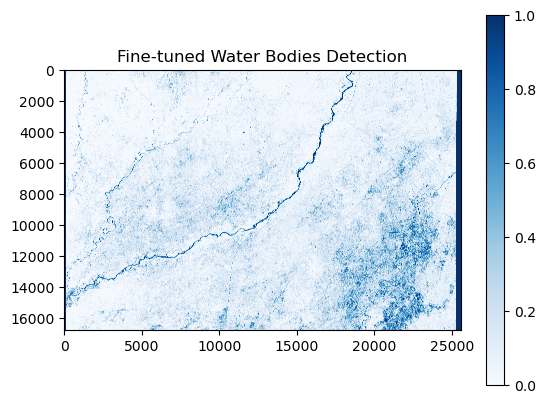

In [9]:
# Adjust the threshold value based on image characteristics
threshold_value = np.percentile(sar_data, 15)  # Try a lower threshold
water_mask = sar_data < threshold_value

# Plot the fine-tuned water mask
plt.imshow(water_mask, cmap='Blues')
plt.title('Fine-tuned Water Bodies Detection')
plt.colorbar()
plt.show()


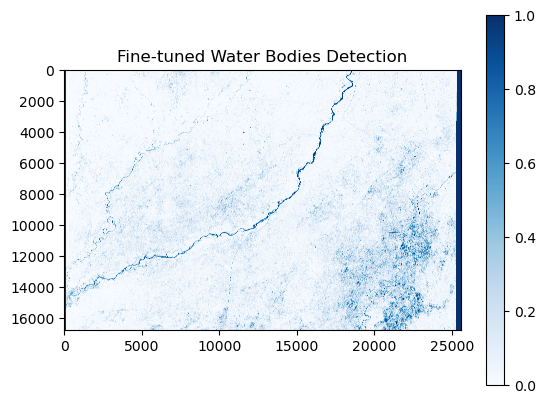

In [11]:
# Adjust the threshold value based on image characteristics
threshold_value = np.percentile(sar_data, 10)  # Try a lower threshold
water_mask = sar_data < threshold_value

# Plot the fine-tuned water mask
plt.imshow(water_mask, cmap='Blues')
plt.title('Fine-tuned Water Bodies Detection')
plt.colorbar()
plt.show()

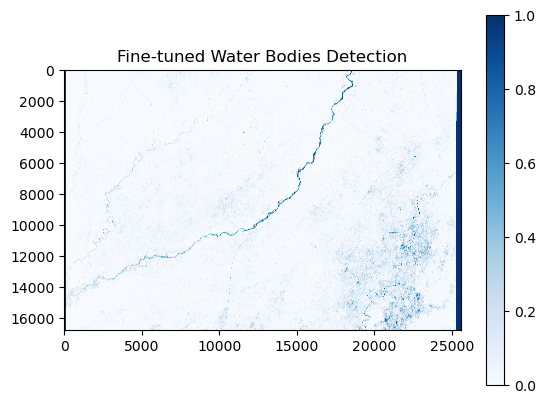

In [12]:
# Adjust the threshold value based on image characteristics
threshold_value = np.percentile(sar_data, 5)  # Try a lower threshold
water_mask = sar_data < threshold_value

# Plot the fine-tuned water mask
plt.imshow(water_mask, cmap='Blues')
plt.title('Fine-tuned Water Bodies Detection')
plt.colorbar()
plt.show()

In [13]:
# Load both VH and VV bands if available
with rasterio.open('path_to_VH_band.tiff') as src_vh, rasterio.open('path_to_VV_band.tiff') as src_vv:
    vh_band = src_vh.read(1)
    vv_band = src_vv.read(1)

# Average the VH and VV bands
avg_band = (vh_band + vv_band) / 2

# Apply thresholding on the averaged data
threshold_value = np.percentile(avg_band, 25)
water_mask = avg_band < threshold_value

# Plot the water mask
plt.imshow(water_mask, cmap='Blues')
plt.title('Water Bodies Detection (VH + VV)')
plt.show()


RasterioIOError: path_to_VH_band.tiff: No such file or directory

In [2]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Load the TIFF file
tiff_file = 'wassaf.tiff'  # Replace with your file path

# Open the file using rasterio
with rasterio.open(tiff_file) as src:
    tiff_data = src.read(1)  # Read the first band (for single-band TIFF)
    
    # Display basic information
    print(f"Width: {src.width}, Height: {src.height}")
    print(f"Number of Bands: {src.count}")
    print(f"CRS: {src.crs}")
    print(f"Pixel Value Range: {np.min(tiff_data)} - {np.max(tiff_data)}")


Width: 25587, Height: 16745
Number of Bands: 1
CRS: None
Pixel Value Range: 0 - 13989


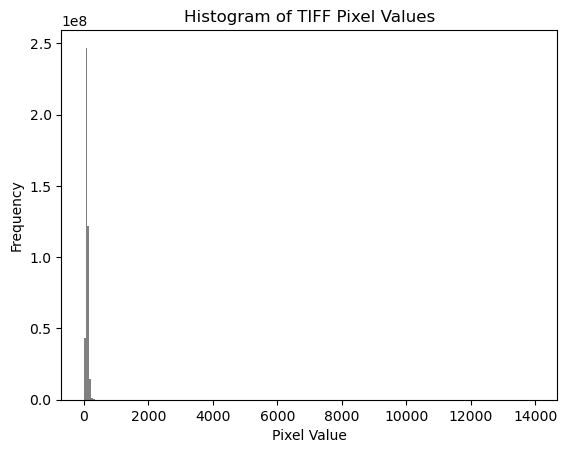

In [5]:
# Plot the histogram of the TIFF pixel values
plt.hist(tiff_data.flatten(), bins=256, range=[np.min(tiff_data), np.max(tiff_data)], color='gray')
plt.title('Histogram of TIFF Pixel Values')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()


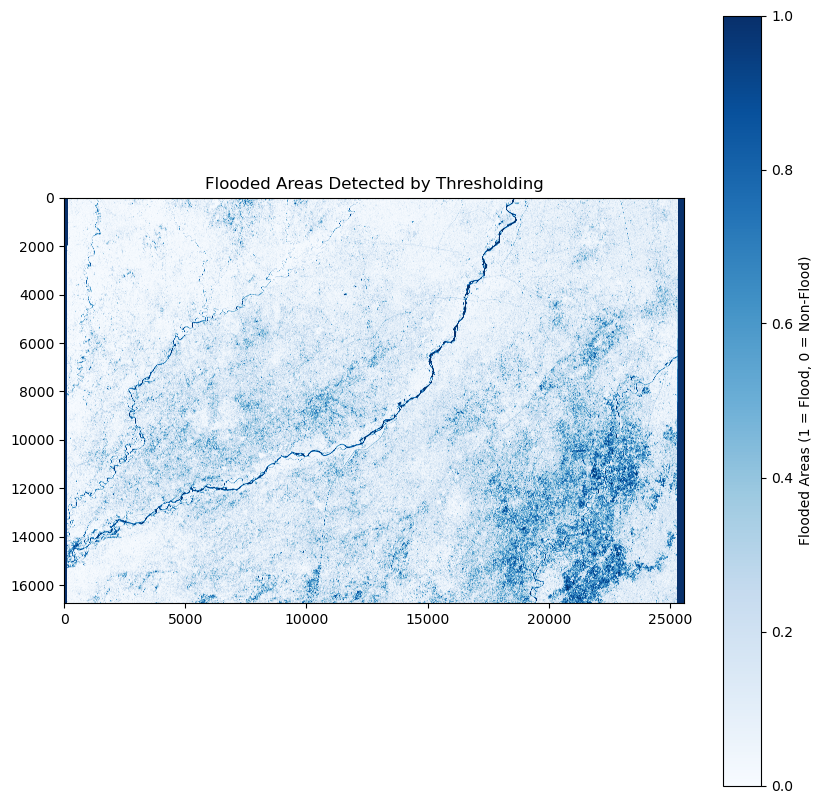

In [6]:
# Set a threshold value based on the histogram analysis or experimentation
threshold_value = np.percentile(tiff_data, 20)  # Use 20th percentile as an example threshold

# Create a binary mask where 1 = flooded area and 0 = non-flooded
flood_mask = tiff_data < threshold_value

# Plot the binary mask
plt.figure(figsize=(10, 10))
plt.imshow(flood_mask, cmap='Blues')
plt.title('Flooded Areas Detected by Thresholding')
plt.colorbar(label='Flooded Areas (1 = Flood, 0 = Non-Flood)')
plt.show()


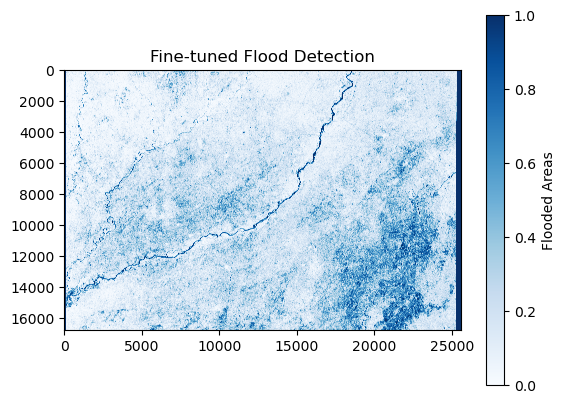

In [7]:
# Try a different threshold based on the histogram
threshold_value = np.percentile(tiff_data, 25)  # Try a higher percentile (e.g., 25th)
flood_mask = tiff_data < threshold_value

# Plot the fine-tuned flood mask
plt.imshow(flood_mask, cmap='Blues')
plt.title('Fine-tuned Flood Detection')
plt.colorbar(label='Flooded Areas')
plt.show()


In [9]:
# Convert the flood mask to uint8 (0 and 1 instead of True and False)
flood_mask_uint8 = flood_mask.astype(np.uint8)


In [10]:
# Save the binary flood mask as a new GeoTIFF file
with rasterio.open(
    'output_flood_mask.tiff', 'w',
    driver='GTiff',
    height=flood_mask.shape[0],
    width=flood_mask.shape[1],
    count=1,  # Single band
    dtype=flood_mask_uint8.dtype,  # Use uint8
    crs=src.crs,  # Coordinate reference system
    transform=src.transform  # GeoTransform (mapping between pixel and coordinate space)
) as dst:
    dst.write(flood_mask_uint8, 1)  # Write the uint8 mask


C:\Users\hp\anaconda3\Lib\site-packages\rasterio\__init__.py:327: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


In [12]:
# Open the original TIFF file and check its georeferencing information
with rasterio.open('wassaf.tiff') as src:
    print(f"CRS: {src.crs}")
    print(f"Transform: {src.transform}")


CRS: None
Transform: | 1.00, 0.00, 0.00|
| 0.00, 1.00, 0.00|
| 0.00, 0.00, 1.00|
